## Patients taken drugs / Total patients in each time window

In [1]:
import numpy as np
import pandas as pd

eicu_mimic_data = pd.read_csv("../data/eicu_mimic_drug_lab_2.csv")

eicu_patient = pd.read_csv("../data/eicu/patient.csv")
# unitDischargeOffset is the time from unit admission to unit discharge in minutes
eicu_drugs = pd.read_csv("../data/eicu/medication.csv")
# drugstartoffset is the time from unit admission to drug start in minutes
# drugstopoffset is the time from unit admission to drug stop in minutes
# join eicu_patient and eicu_drugs on patientunitstayid
eicu_patient_drugs = pd.merge(eicu_patient, eicu_drugs, on="patientunitstayid")
eicu_patient_drugs = eicu_patient_drugs[eicu_patient_drugs["patientunitstayid"].isin(eicu_mimic_data["patientunitstayid"].unique())]
eicu_patient_drugs = eicu_patient_drugs[eicu_patient_drugs["drugname"].notnull()]
eicu_patient_drugs.head()

/var/folders/wd/d0j10lq906x4lfc0bphzybd80000gn/T/ipykernel_21222/2487729286.py:8: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  eicu_drugs = pd.read_csv("../data/eicu/medication.csv")


,patientunitstayid,patienthealthsystemstayid,gender,age,ethnicity,hospitalid,wardid,apacheadmissiondx,admissionheight,hospitaladmittime24,...,drugordercancelled,drugname,drughiclseqno,dosage,routeadmin,frequency,loadingdose,prn,drugstopoffset,gtc
1240052,534589,451226,Male,86,Caucasian,165,337,NaN,178.0,18:40:00,...,No,amLODIPine 5 MG TAB,6494.0,10 mg,PO,DAILY,NaN,No,9408,38
1240053,534589,451226,Male,86,Caucasian,165,337,NaN,178.0,18:40:00,...,Yes,potassium CHLORIDE 10 mEq i,549.0,10 mEq,IVPB,Q30MIN X4,NaN,No,1440,59
1240054,534589,451226,Male,86,Caucasian,165,337,NaN,178.0,18:40:00,...,Yes,potassium CHLORIDE 10 mEq i,549.0,10 mEq,IVPB,Q30MIN X2,NaN,No,4260,59
1240055,534589,451226,Male,86,Caucasian,165,337,NaN,178.0,18:40:00,...,No,SODIUM CHLORIDE 0.9% 1000 ML LVP,8255.0,"1,000 mL",IV,X3,NaN,No,9408,59
1240056,534589,451226,Male,86,Caucasian,165,337,NaN,178.0,18:40:00,...,Yes,MAGNESIUM OXIDE 400 MG TAB,609.0,400 mg,PO,Q4H (int) X2,NaN,No,5910,59


In [2]:
import numpy as np

total_time_window = 72 * 60
one_time_window = 12 * 60

eicu_hospital_ids = [148, 281, 167, 420, 199, 458, 165, 252, 283, 449]

eicu_drug_patient_percentage = np.zeros((len(eicu_hospital_ids), total_time_window // one_time_window))

for time_window_start in range(0, total_time_window, one_time_window):
    
    time_window_index = time_window_start // one_time_window
    time_window_end = time_window_start + one_time_window
    
    for index, hospital_id in enumerate(eicu_hospital_ids):
        
        eicu_hospital_data = eicu_patient_drugs[eicu_patient_drugs["hospitalid"] == hospital_id]
        eicu_data_in_time_window = eicu_hospital_data[(eicu_hospital_data["drugstopoffset"] >= time_window_start) & (eicu_hospital_data["drugstartoffset"] <= time_window_end)]
        
        patients_in_time_window = eicu_data_in_time_window["patientunitstayid"].unique()
        total_hospital_patients = eicu_hospital_data["patientunitstayid"].unique()
        
        patients_took_drug_percentage = len(patients_in_time_window) / len(total_hospital_patients)
        eicu_drug_patient_percentage[index, time_window_index] = patients_took_drug_percentage
        
eicu_drug_patient_percentage

array([[0.82061483, 0.91139241, 0.88716094, 0.83291139, 0.7801085 ,
        0.70379747],
       [0.96133918, 0.96213631, 0.92626544, 0.89398167, 0.82582702,
        0.77640494],
       [0.81513192, 0.90319762, 0.89183994, 0.86056264, 0.81023938,
        0.74453958],
       [0.97833622, 0.97010399, 0.96360485, 0.95797227, 0.9512565 ,
        0.94692374],
       [0.84224864, 0.90663695, 0.90292224, 0.88509163, 0.83977216,
        0.77662209],
       [0.9623431 , 0.89986053, 0.88312413, 0.85746165, 0.8195258 ,
        0.78549512],
       [0.82443532, 0.90109514, 0.87371663, 0.84804928, 0.79123888,
        0.72997947],
       [0.98179104, 0.97074627, 0.93850746, 0.89074627, 0.82656716,
        0.77253731],
       [0.97310279, 0.97262248, 0.93756004, 0.89577329, 0.85302594,
        0.80403458],
       [0.99240626, 0.9833887 , 0.94447081, 0.91504509, 0.84053156,
        0.79117228]])

In [3]:
eicu_mimic = pd.read_csv("../data/eicu_mimic_drug_lab_2.csv")
eicu_mimic.head()

,patientunitstayid,hospitalid,death,acetamin,biotene,compazine,ferrous,imdur,lidocaine,milk of magnesia,...,paco2,ph,albu_lab,bands,bun,hct,inr,lactate,platelets,wbc
0,85639.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.147597,0.427789,0.0,0.0,1.288533,2.557923,2.204273,2.191031,-1.555455,0.0
1,82621.0,-2.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.012631,0.267391,0.0,0.0,-0.658234,-0.709963,-0.789680,-0.727193,-0.874577,0.0
2,45639.0,-1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,-0.342786,-1.382652,0.104037,0.000000,-0.369941,0.0
3,52592.0,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.000000,0.000000,0.0,0.0,-0.559093,-0.516955,-0.432193,0.000000,0.810501,0.0
4,51703.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.525502,-0.011561,0.0,0.0,-0.207594,0.485928,0.000000,-0.620861,-0.444749,0.0


In [4]:
mimic_patients = eicu_mimic[(eicu_mimic["hospitalid"] == -1) | (eicu_mimic["hospitalid"] == -2)]
total_mimic_patients_count = len(mimic_patients["patientunitstayid"].unique())
total_mimic_patients_count

5000

In [5]:
mimic_admissions = pd.read_csv('../data/mimic/ADMISSIONS.csv')
mimic_admissions = mimic_admissions[mimic_admissions['SUBJECT_ID'].isin(mimic_patients['patientunitstayid'].unique())]
mimic_admissions = mimic_admissions.sort_values('ADMITTIME').drop_duplicates('SUBJECT_ID', keep='last')
mimic_admissions

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_IOEVENTS_DATA,HAS_CHARTEVENTS_DATA
54674,52357,79168,125272,2100-07-05 15:22:00,2100-07-27 17:00:00,NaN,EMERGENCY,CLINIC REFERRAL/PREMATURE,REHAB/DISTINCT PART HOSP,Private,ENGL,CATHOLIC,MARRIED,WHITE,2100-07-05 11:40:00,2100-07-05 16:41:00,MALAISE S/P SLEEVE GASTRECTOMY,0,1,1
48868,50295,72723,146616,2100-07-09 10:43:00,2100-07-17 15:00:00,NaN,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOME HEALTH CARE,Private,ENGL,NOT SPECIFIED,SINGLE,WHITE,2100-07-09 05:56:00,2100-07-09 15:55:00,ABDOMINAL PAIN;JAUNDICE,0,1,1
37943,38060,31288,136246,2100-07-16 11:29:00,2100-07-22 18:00:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,ENGL,UNOBTAINABLE,WIDOWED,WHITE,2100-07-16 08:08:00,2100-07-16 12:20:00,INTRACRANIAL HEMORRHAGE,0,0,1
47863,48963,68501,139687,2100-07-26 07:15:00,2100-07-30 11:43:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,REHAB/DISTINCT PART HOSP,Medicare,ENGL,PROTESTANT QUAKER,WIDOWED,WHITE,NaN,NaN,CAROTID STENOSIS/SDA,0,1,1
53196,54126,84686,131910,2100-08-16 07:15:00,2100-09-08 15:10:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,LONG TERM CARE HOSPITAL,Private,ENGL,CATHOLIC,MARRIED,WHITE,NaN,NaN,PANCOAST TUMOR/SDA,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47701,50826,74493,198110,2206-06-09 16:43:00,2206-06-12 17:00:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,NaN,NaN,ACUTE MYOCARDIAL INFARCTION,0,1,1
4832,4839,3987,106870,2206-06-18 17:25:00,2206-07-03 13:45:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,REHAB/DISTINCT PART HOSP,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,NaN,NaN,ST ELEVATION MYOCARDIAL INFARCTION\CORONARY IN...,0,1,1
17953,18379,15025,116670,2207-06-16 22:12:00,2207-06-20 15:29:00,NaN,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOME,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,2207-06-16 19:09:00,2207-06-17 00:34:00,UNRESPONSIVE,0,1,1
23716,21618,17692,175081,2208-01-21 13:28:00,2208-02-05 11:45:00,2208-02-05 11:45:00,EMERGENCY,CLINIC REFERRAL/PREMATURE,DEAD/EXPIRED,Medicare,ENGL,NOT SPECIFIED,WIDOWED,WHITE,2208-01-21 10:10:00,2208-01-21 14:17:00,PERFORATED DIVERTICULITIS,1,1,1


In [6]:
mimic_icu_stays = pd.read_csv("../data/mimic/ICUSTAYS.csv")
mimic_icu_stays = mimic_icu_stays[mimic_icu_stays["SUBJECT_ID"].isin(mimic_patients["patientunitstayid"].unique())]
mimic_icu_stays = mimic_icu_stays[mimic_icu_stays["HADM_ID"].isin(mimic_admissions["HADM_ID"].unique())]
mimic_icu_stays.head()

,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,DBSOURCE,FIRST_CAREUNIT,LAST_CAREUNIT,FIRST_WARDID,LAST_WARDID,INTIME,OUTTIME,LOS
24,156,109,189332,287547,metavision,MICU,MICU,23,23,2142-08-28 19:49:27,2142-08-30 16:10:05,1.8477
27,159,111,155897,249202,metavision,MICU,MICU,52,23,2144-07-01 04:13:59,2144-07-01 17:56:31,0.5712
44,176,124,138376,256064,metavision,SICU,SICU,57,57,2166-01-09 13:05:18,2166-02-01 10:52:09,22.9075
154,286,209,190711,229904,metavision,CCU,CCU,7,7,2127-08-11 20:43:43,2127-08-15 20:53:22,4.0067
308,117,107,174162,264253,metavision,MICU,MICU,50,50,2122-05-14 19:38:27,2122-05-16 17:59:33,1.9313


In [24]:
len(mimic_icu_stays["SUBJECT_ID"].unique())

4973

In [7]:
mimic_drugs = pd.read_csv("../data/mimic/PRESCRIPTIONS.csv")
mimic_drugs = mimic_drugs[mimic_drugs["SUBJECT_ID"].isin(mimic_patients["patientunitstayid"].unique())]
mimic_drugs = mimic_drugs[mimic_drugs["HADM_ID"].isin(mimic_icu_stays["HADM_ID"].unique())]
mimic_drugs.head()

/var/folders/wd/d0j10lq906x4lfc0bphzybd80000gn/T/ipykernel_21222/2079292063.py:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  mimic_drugs = pd.read_csv("../data/mimic/PRESCRIPTIONS.csv")


,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,STARTDATE,ENDDATE,DRUG_TYPE,DRUG,DRUG_NAME_POE,DRUG_NAME_GENERIC,FORMULARY_DRUG_CD,GSN,NDC,PROD_STRENGTH,DOSE_VAL_RX,DOSE_UNIT_RX,FORM_VAL_DISP,FORM_UNIT_DISP,ROUTE
40,99,57139,174761,NaN,2186-04-05 00:00:00,2186-04-16 00:00:00,MAIN,Sodium Chloride 0.9% Flush,Sodium Chloride 0.9% Flush,Sodium Chloride 0.9% Flush,NACLFLUSH,NaN,0.000000e+00,Syringe,3,mL,0.6,SYR,IV
41,100,57139,174761,NaN,2186-04-05 00:00:00,2186-04-16 00:00:00,MAIN,Rifaximin,Rifaximin,Rifaximin,RIFA200,041880,6.564903e+10,200mg Tablet,400,mg,2,TAB,PO
42,101,57139,174761,NaN,2186-04-05 00:00:00,2186-04-16 00:00:00,MAIN,Metoclopramide,Metoclopramide,Metoclopramide,METO10,005231,9.041071e+08,10mg Tab,5,mg,0.5,TAB,PO
43,102,57139,174761,NaN,2186-04-05 00:00:00,2186-04-16 00:00:00,MAIN,Prochlorperazine,Prochlorperazine,Prochlorperazine Maleate,PROC5,003848,5.107905e+10,5 mg Tab,5,mg,1,TAB,PO
44,103,57139,174761,NaN,2186-04-05 00:00:00,2186-04-16 00:00:00,MAIN,Triamcinolone Acetonide 0.1% Cream,Triamcinolone Acetonide 0.1% Cream,Triamcinolone Acetonide 0.1% Cream,TRIA.1/80C,007594,1.680005e+08,80gm Tube,1,Appl,0.01,TUBE,TP


In [8]:
mimic_icu_stays_drugs = pd.merge(mimic_icu_stays, mimic_drugs, on=["HADM_ID","SUBJECT_ID","ICUSTAY_ID"])
mimic_icu_stays_drugs["drugstartoffset"] = (pd.to_datetime(mimic_icu_stays_drugs["STARTDATE"]) - pd.to_datetime(mimic_icu_stays_drugs["INTIME"])).dt.total_seconds() / 60
mimic_icu_stays_drugs["drugstopoffset"] = (pd.to_datetime(mimic_icu_stays_drugs["ENDDATE"]) - pd.to_datetime(mimic_icu_stays_drugs["INTIME"])).dt.total_seconds() / 60
mimic_icu_stays_drugs.head()

,ROW_ID_x,SUBJECT_ID,HADM_ID,ICUSTAY_ID,DBSOURCE,FIRST_CAREUNIT,LAST_CAREUNIT,FIRST_WARDID,LAST_WARDID,INTIME,...,GSN,NDC,PROD_STRENGTH,DOSE_VAL_RX,DOSE_UNIT_RX,FORM_VAL_DISP,FORM_UNIT_DISP,ROUTE,drugstartoffset,drugstopoffset
0,156,109,189332,287547,metavision,MICU,MICU,23,23,2142-08-28 19:49:27,...,001195,5.742002e+08,15g/60mL Bottle,30,gm,2,BTL,PO,250.550000,250.550000
1,156,109,189332,287547,metavision,MICU,MICU,23,23,2142-08-28 19:49:27,...,061716,7.813057e+08,2mg/mL-2mL,4,mg,1,VIAL,IV,250.550000,1690.550000
2,156,109,189332,287547,metavision,MICU,MICU,23,23,2142-08-28 19:49:27,...,006549,6.332303e+10,5000 Units / mL- 1mL Vial,4000-11000,UNIT,0.8-2.2,mL,DWELL,250.550000,250.550000
3,156,109,189332,287547,metavision,MICU,MICU,23,23,2142-08-28 19:49:27,...,006549,6.332303e+10,5000 Units / mL- 1mL Vial,4000-11000,UNIT,0.8-2.2,mL,DWELL,250.550000,1690.550000
4,159,111,155897,249202,metavision,MICU,MICU,52,23,2144-07-01 04:13:59,...,NaN,0.000000e+00,Syringe,10,mL,2,SYR,IV,-253.983333,-253.983333


In [9]:
import numpy as np

total_time_window = 72 * 60
one_time_window = 12 * 60

mimic_hospital_ids = [-1, -2]

mimic_drug_patient_percentage = np.zeros((len(mimic_hospital_ids), total_time_window // one_time_window))

for time_window_start in range(0, total_time_window, one_time_window):
    
    time_window_index = time_window_start // one_time_window
    time_window_end = time_window_start + one_time_window
    
    for index, hospital_id in enumerate(mimic_hospital_ids):
        
        mimic_hospital_data = eicu_mimic[eicu_mimic["hospitalid"] == hospital_id]
        mimic_hospital_patients = mimic_hospital_data["patientunitstayid"].unique()
        
        mimic_hospital_drugs = mimic_icu_stays_drugs[mimic_icu_stays_drugs["SUBJECT_ID"].isin(mimic_hospital_patients)]
        
        mimic_data_in_time_window = mimic_hospital_drugs[(mimic_hospital_drugs["drugstopoffset"] >= time_window_start) & (mimic_hospital_drugs["drugstartoffset"] <= time_window_end)]
        
        patients_in_time_window = mimic_data_in_time_window["SUBJECT_ID"].unique()
        total_hospital_patients = mimic_hospital_data["patientunitstayid"].unique()
        
        patients_took_drug_percentage = len(patients_in_time_window) / len(total_hospital_patients)
        mimic_drug_patient_percentage[index, time_window_index] = patients_took_drug_percentage
        
mimic_drug_patient_percentage

array([[0.9759859 , 0.94448116, 0.93148271, 0.86979511, 0.84159506,
        0.76756995],
       [0.99566161, 0.99132321, 0.99566161, 0.99566161, 0.99132321,
        0.98264642]])

In [10]:
drug_patient_percentage = np.concatenate((eicu_drug_patient_percentage, mimic_drug_patient_percentage), axis=0)
drug_patient_percentage

array([[0.82061483, 0.91139241, 0.88716094, 0.83291139, 0.7801085 ,
        0.70379747],
       [0.96133918, 0.96213631, 0.92626544, 0.89398167, 0.82582702,
        0.77640494],
       [0.81513192, 0.90319762, 0.89183994, 0.86056264, 0.81023938,
        0.74453958],
       [0.97833622, 0.97010399, 0.96360485, 0.95797227, 0.9512565 ,
        0.94692374],
       [0.84224864, 0.90663695, 0.90292224, 0.88509163, 0.83977216,
        0.77662209],
       [0.9623431 , 0.89986053, 0.88312413, 0.85746165, 0.8195258 ,
        0.78549512],
       [0.82443532, 0.90109514, 0.87371663, 0.84804928, 0.79123888,
        0.72997947],
       [0.98179104, 0.97074627, 0.93850746, 0.89074627, 0.82656716,
        0.77253731],
       [0.97310279, 0.97262248, 0.93756004, 0.89577329, 0.85302594,
        0.80403458],
       [0.99240626, 0.9833887 , 0.94447081, 0.91504509, 0.84053156,
        0.79117228],
       [0.9759859 , 0.94448116, 0.93148271, 0.86979511, 0.84159506,
        0.76756995],
       [0.99566161, 0

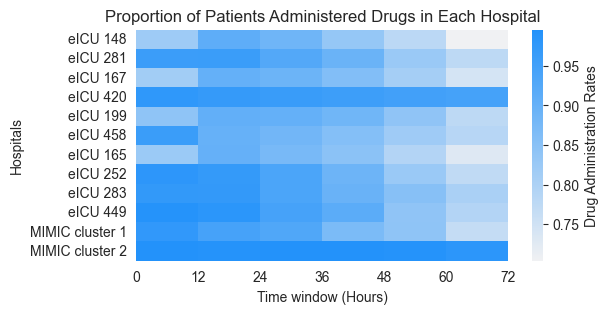

In [11]:
import matplotlib.pyplot as plt

import seaborn as sns
import matplotlib.pyplot as plt

y_tick_labels = ["eICU " + str(hospital_id) for hospital_id in eicu_hospital_ids] + ["MIMIC cluster 1", "MIMIC cluster 2"]

# x_tick_labels = []
# for time_window in range((total_time_window + one_time_window) // one_time_window):
#     x_tick_labels.append(time_window)

x_tick_labels = [0, 12, 24, 36, 48, 60, 72]

plt.figure(figsize=(6, 3))
plt.title("Proportion of Patients Administered Drugs in Each Hospital")
rdgn = sns.light_palette("#2392fa", as_cmap=True)
ax = sns.heatmap(drug_patient_percentage, cmap=rdgn)
ax.set_yticklabels(y_tick_labels, rotation=0)
plt.xticks(ticks=(np.arange(len(x_tick_labels))), labels=x_tick_labels, rotation=0)
colorbar = ax.collections[0].colorbar
colorbar.set_label("Drug Administration Rates")
plt.ylabel("Hospitals")
plt.xlabel("Time window (Hours)")
plt.show()

## Drugs taken by patients / Total drugs in each time window

In [12]:
import numpy as np

total_time_window = 72 * 60
one_time_window = 12 * 60

eicu_hospital_ids = [148, 281, 167, 420, 199, 458, 165, 252, 283, 449]

eicu_drug_taken_percentage = np.zeros((len(eicu_hospital_ids), total_time_window // one_time_window))

for time_window_start in range(0, total_time_window, one_time_window):
    
    time_window_index = time_window_start // one_time_window
    time_window_end = time_window_start + one_time_window
    
    for index, hospital_id in enumerate(eicu_hospital_ids):
        
        eicu_hospital_data = eicu_patient_drugs[eicu_patient_drugs["hospitalid"] == hospital_id]
        eicu_data_in_time_window = eicu_hospital_data[(eicu_hospital_data["drugstopoffset"] >= time_window_start) & (eicu_hospital_data["drugstartoffset"] <= time_window_end)]
        
        drugs_in_time_window = eicu_data_in_time_window["drugname"].unique()
        total_hospital_drugs = eicu_patient_drugs["drugname"].unique()
        
        drug_taken_percentage = len(drugs_in_time_window) / len(total_hospital_drugs)
        eicu_drug_taken_percentage[index, time_window_index] = drug_taken_percentage
        
eicu_drug_taken_percentage

array([[0.19587629, 0.19458763, 0.19458763, 0.19587629, 0.19587629,
        0.19587629],
       [0.15335052, 0.15335052, 0.15335052, 0.15206186, 0.15206186,
        0.1507732 ],
       [0.19329897, 0.19329897, 0.19329897, 0.19329897, 0.19329897,
        0.19329897],
       [0.19329897, 0.19201031, 0.19072165, 0.19201031, 0.19072165,
        0.19072165],
       [0.15850515, 0.16237113, 0.15592784, 0.15979381, 0.15721649,
        0.15463918],
       [0.15463918, 0.12757732, 0.12113402, 0.12242268, 0.11984536,
        0.12371134],
       [0.19458763, 0.19329897, 0.19458763, 0.19329897, 0.19329897,
        0.19458763],
       [0.21134021, 0.21262887, 0.21005155, 0.21134021, 0.21134021,
        0.21005155],
       [0.21005155, 0.21005155, 0.21134021, 0.21134021, 0.21134021,
        0.21005155],
       [0.20747423, 0.20618557, 0.20618557, 0.20489691, 0.20618557,
        0.20618557]])

In [13]:
import numpy as np

total_time_window = 72 * 60
one_time_window = 12 * 60

mimic_hospital_ids = [-1, -2]

mimic_drug_taken_percentage = np.zeros((len(mimic_hospital_ids), total_time_window // one_time_window))

for time_window_start in range(0, total_time_window, one_time_window):
    
    time_window_index = time_window_start // one_time_window
    time_window_end = time_window_start + one_time_window
    
    for index, hospital_id in enumerate(mimic_hospital_ids):
        
        mimic_hospital_data = eicu_mimic[eicu_mimic["hospitalid"] == hospital_id]
        mimic_hospital_patients = mimic_hospital_data["patientunitstayid"].unique()
        
        mimic_hospital_drugs = mimic_icu_stays_drugs[mimic_icu_stays_drugs["SUBJECT_ID"].isin(mimic_hospital_patients)]
        
        mimic_data_in_time_window = mimic_hospital_drugs[(mimic_hospital_drugs["drugstopoffset"] >= time_window_start) & (mimic_hospital_drugs["drugstartoffset"] <= time_window_end)]
        
        drugs_in_time_window = mimic_data_in_time_window["DRUG"].unique()
        total_hospital_drugs = mimic_icu_stays_drugs["DRUG"].unique()
        
        drug_taken_percentage = len(drugs_in_time_window) / len(total_hospital_drugs)
        mimic_drug_taken_percentage[index, time_window_index] = drug_taken_percentage
        
mimic_drug_taken_percentage

array([[0.74854651, 0.76235465, 0.78851744, 0.76235465, 0.77107558,
        0.7369186 ],
       [0.25581395, 0.3059593 , 0.29723837, 0.31468023, 0.31177326,
        0.31104651]])

In [14]:
drug_taken_percentage = np.concatenate((eicu_drug_taken_percentage, mimic_drug_taken_percentage), axis=0)
drug_taken_percentage

array([[0.19587629, 0.19458763, 0.19458763, 0.19587629, 0.19587629,
        0.19587629],
       [0.15335052, 0.15335052, 0.15335052, 0.15206186, 0.15206186,
        0.1507732 ],
       [0.19329897, 0.19329897, 0.19329897, 0.19329897, 0.19329897,
        0.19329897],
       [0.19329897, 0.19201031, 0.19072165, 0.19201031, 0.19072165,
        0.19072165],
       [0.15850515, 0.16237113, 0.15592784, 0.15979381, 0.15721649,
        0.15463918],
       [0.15463918, 0.12757732, 0.12113402, 0.12242268, 0.11984536,
        0.12371134],
       [0.19458763, 0.19329897, 0.19458763, 0.19329897, 0.19329897,
        0.19458763],
       [0.21134021, 0.21262887, 0.21005155, 0.21134021, 0.21134021,
        0.21005155],
       [0.21005155, 0.21005155, 0.21134021, 0.21134021, 0.21134021,
        0.21005155],
       [0.20747423, 0.20618557, 0.20618557, 0.20489691, 0.20618557,
        0.20618557],
       [0.74854651, 0.76235465, 0.78851744, 0.76235465, 0.77107558,
        0.7369186 ],
       [0.25581395, 0

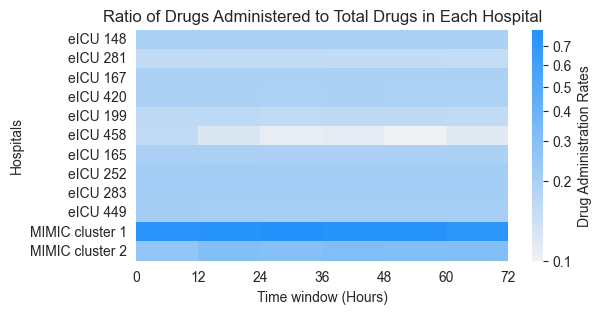

In [15]:
import matplotlib.pyplot as plt

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import PowerNorm

y_tick_labels = ["eICU " + str(hospital_id) for hospital_id in eicu_hospital_ids] + ["MIMIC cluster 1", "MIMIC cluster 2"]

# x_tick_labels = []
# for time_window in range((total_time_window + one_time_window) // one_time_window):
#     x_tick_labels.append(time_window)

x_tick_labels = [0, 12, 24, 36, 48, 60, 72]

plt.figure(figsize=(6, 3))
plt.title("Ratio of Drugs Administered to Total Drugs in Each Hospital")
rdgn = sns.light_palette("#2392fa", as_cmap=True)
ax = sns.heatmap(drug_taken_percentage, cmap=rdgn, norm=PowerNorm(gamma=0.5))
ax.set_yticklabels(y_tick_labels, rotation=0)
plt.xticks(ticks=(np.arange(len(x_tick_labels))), labels=x_tick_labels, rotation=0)
colorbar = ax.collections[0].colorbar
colorbar.set_label("Drug Administration Rates")
plt.ylabel("Hospitals")
plt.xlabel("Time window (Hours)")
plt.show()

## Length of Stay in ICU

In [16]:
import numpy as np

total_time_window = 72 * 60
one_time_window = 12 * 60

eicu_hospital_ids = [148, 281, 167, 420, 199, 458, 165, 252, 283, 449]

eicu_discharge_patient_percentage = np.zeros((len(eicu_hospital_ids), total_time_window // one_time_window))

for time_window_start in range(0, total_time_window, one_time_window):
    
    time_window_index = time_window_start // one_time_window
    time_window_end = time_window_start + one_time_window
    
    for index, hospital_id in enumerate(eicu_hospital_ids):
        
        eicu_hospital_data = eicu_patient_drugs[eicu_patient_drugs["hospitalid"] == hospital_id]
        
        eicu_discharge_data = eicu_hospital_data[(eicu_hospital_data["unitdischargeoffset"] >= time_window_start) & (eicu_hospital_data["unitdischargeoffset"] <= time_window_end)]
        
        eicu_discharge_patient = eicu_discharge_data["patientunitstayid"].unique()
        total_hospital_patients = eicu_hospital_data["patientunitstayid"].unique()
        
        discharge_patient_percentage = len(eicu_discharge_patient) / len(total_hospital_patients)
        eicu_discharge_patient_percentage[index, time_window_index] = discharge_patient_percentage
        
eicu_discharge_patient_percentage

array([[0.2954792 , 0.19963834, 0.1164557 , 0.12947559, 0.04990958,
        0.04810127],
       [0.06257473, 0.16301315, 0.13989637, 0.13511359, 0.08449582,
        0.08848147],
       [0.32972217, 0.22575572, 0.12441027, 0.08684257, 0.04053818,
        0.03879084],
       [0.07062392, 0.11460139, 0.12066724, 0.12370017, 0.08860485,
        0.08318891],
       [0.15874195, 0.14735017, 0.12481426, 0.11416543, 0.08147598,
        0.07924715],
       [0.05997211, 0.16317992, 0.1525802 , 0.14198047, 0.09093445,
        0.07085077],
       [0.33127995, 0.23921971, 0.12491444, 0.08487337, 0.04209446,
        0.04414784],
       [0.06656716, 0.1761194 , 0.15522388, 0.12567164, 0.08477612,
        0.06925373],
       [0.06243996, 0.20317003, 0.15225744, 0.14553314, 0.09125841,
        0.0778098 ],
       [0.04413859, 0.17275748, 0.13621262, 0.14143332, 0.08637874,
        0.08305648]])

In [17]:
mimic_icu_stays_drugs["LOS"] = (pd.to_datetime(mimic_icu_stays_drugs["OUTTIME"]) - pd.to_datetime(mimic_icu_stays_drugs["INTIME"])).dt.total_seconds() / 60
mimic_icu_stays_drugs.head()

,ROW_ID_x,SUBJECT_ID,HADM_ID,ICUSTAY_ID,DBSOURCE,FIRST_CAREUNIT,LAST_CAREUNIT,FIRST_WARDID,LAST_WARDID,INTIME,...,GSN,NDC,PROD_STRENGTH,DOSE_VAL_RX,DOSE_UNIT_RX,FORM_VAL_DISP,FORM_UNIT_DISP,ROUTE,drugstartoffset,drugstopoffset
0,156,109,189332,287547,metavision,MICU,MICU,23,23,2142-08-28 19:49:27,...,001195,5.742002e+08,15g/60mL Bottle,30,gm,2,BTL,PO,250.550000,250.550000
1,156,109,189332,287547,metavision,MICU,MICU,23,23,2142-08-28 19:49:27,...,061716,7.813057e+08,2mg/mL-2mL,4,mg,1,VIAL,IV,250.550000,1690.550000
2,156,109,189332,287547,metavision,MICU,MICU,23,23,2142-08-28 19:49:27,...,006549,6.332303e+10,5000 Units / mL- 1mL Vial,4000-11000,UNIT,0.8-2.2,mL,DWELL,250.550000,250.550000
3,156,109,189332,287547,metavision,MICU,MICU,23,23,2142-08-28 19:49:27,...,006549,6.332303e+10,5000 Units / mL- 1mL Vial,4000-11000,UNIT,0.8-2.2,mL,DWELL,250.550000,1690.550000
4,159,111,155897,249202,metavision,MICU,MICU,52,23,2144-07-01 04:13:59,...,NaN,0.000000e+00,Syringe,10,mL,2,SYR,IV,-253.983333,-253.983333


In [18]:
import numpy as np

total_time_window = 72 * 60
one_time_window = 12 * 60

mimic_hospital_ids = [-1, -2]

mimic_discharge_patient_percentage = np.zeros((len(mimic_hospital_ids), total_time_window // one_time_window))

for time_window_start in range(0, total_time_window, one_time_window):
    
    time_window_index = time_window_start // one_time_window
    time_window_end = time_window_start + one_time_window
    
    for index, hospital_id in enumerate(mimic_hospital_ids):
        
        mimic_hospital_data = eicu_mimic[eicu_mimic["hospitalid"] == hospital_id]
        mimic_hospital_patients = mimic_hospital_data["patientunitstayid"].unique()
        
        mimic_hospital_drugs = mimic_icu_stays_drugs[mimic_icu_stays_drugs["SUBJECT_ID"].isin(mimic_hospital_patients)]
        
        mimic_discharge_data = mimic_hospital_drugs[(mimic_hospital_drugs["LOS"] >= time_window_start) & (mimic_hospital_drugs["LOS"] <= time_window_end)]
        
        mimic_discharge_patient = mimic_discharge_data["SUBJECT_ID"].unique()
        total_hospital_patients = mimic_hospital_data["patientunitstayid"].unique()
        
        discharge_patient_percentage = len(mimic_discharge_patient) / len(total_hospital_patients)
        mimic_discharge_patient_percentage[index, time_window_index] = discharge_patient_percentage
        
mimic_discharge_patient_percentage

array([[0.01498127, 0.16391276, 0.19431593, 0.14540648, 0.10310641,
        0.0806345 ],
       [0.        , 0.04121475, 0.45986985, 0.03904555, 0.15618221,
        0.03036876]])

In [19]:
discharge_patient_percentage = np.concatenate((eicu_discharge_patient_percentage, mimic_discharge_patient_percentage), axis=0)
discharge_patient_percentage

array([[0.2954792 , 0.19963834, 0.1164557 , 0.12947559, 0.04990958,
        0.04810127],
       [0.06257473, 0.16301315, 0.13989637, 0.13511359, 0.08449582,
        0.08848147],
       [0.32972217, 0.22575572, 0.12441027, 0.08684257, 0.04053818,
        0.03879084],
       [0.07062392, 0.11460139, 0.12066724, 0.12370017, 0.08860485,
        0.08318891],
       [0.15874195, 0.14735017, 0.12481426, 0.11416543, 0.08147598,
        0.07924715],
       [0.05997211, 0.16317992, 0.1525802 , 0.14198047, 0.09093445,
        0.07085077],
       [0.33127995, 0.23921971, 0.12491444, 0.08487337, 0.04209446,
        0.04414784],
       [0.06656716, 0.1761194 , 0.15522388, 0.12567164, 0.08477612,
        0.06925373],
       [0.06243996, 0.20317003, 0.15225744, 0.14553314, 0.09125841,
        0.0778098 ],
       [0.04413859, 0.17275748, 0.13621262, 0.14143332, 0.08637874,
        0.08305648],
       [0.01498127, 0.16391276, 0.19431593, 0.14540648, 0.10310641,
        0.0806345 ],
       [0.        , 0

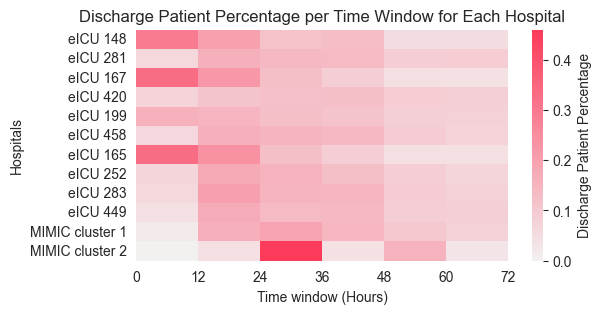

In [20]:
import matplotlib.pyplot as plt

import seaborn as sns
import matplotlib.pyplot as plt

y_tick_labels = ["eICU " + str(hospital_id) for hospital_id in eicu_hospital_ids] + ["MIMIC cluster 1", "MIMIC cluster 2"]

# x_tick_labels = []
# for time_window in range((total_time_window + one_time_window) // one_time_window):
#     x_tick_labels.append(time_window)

x_tick_labels = [0, 12, 24, 36, 48, 60, 72]
    
plt.figure(figsize=(6, 3))
plt.title("Discharge Patient Percentage per Time Window for Each Hospital")
rdgn = sns.light_palette("#fc3a5a", as_cmap=True)
ax = sns.heatmap(discharge_patient_percentage, cmap=rdgn)
ax.set_yticklabels(y_tick_labels, rotation=0)
plt.xticks(ticks=(np.arange(len(x_tick_labels))), labels=x_tick_labels, rotation=0)
colorbar = ax.collections[0].colorbar
colorbar.set_label("Discharge Patient Percentage")
plt.ylabel("Hospitals")
plt.xlabel("Time window (Hours)")
plt.show()

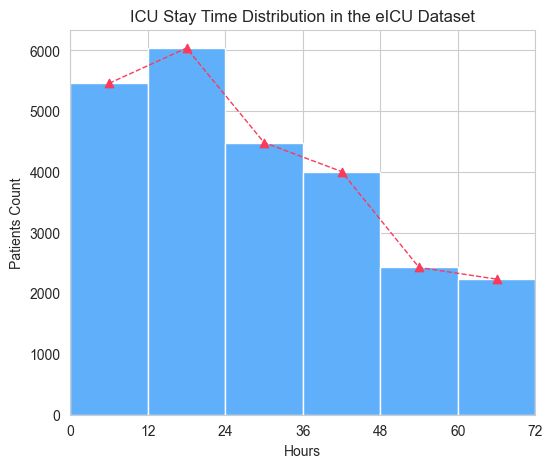

In [21]:
import matplotlib.pyplot as plt

total_time_window = 72 * 60
one_time_window = 12 * 60

eicu_hospital_data_cp = eicu_patient_drugs.copy()
eicu_hospital_data_cp = eicu_hospital_data_cp.sort_values('unitdischargeoffset').drop_duplicates('patientunitstayid', keep='last')
eicu_unit_discharge_offset = eicu_hospital_data_cp["unitdischargeoffset"] / (60 * 24)

eicu_discharge_patient_counts = []

for time_window_start in range(0, total_time_window, one_time_window):
    
    time_window_end = time_window_start + one_time_window
    
    eicu_discharge_data = eicu_hospital_data_cp[(eicu_hospital_data_cp["unitdischargeoffset"] >= time_window_start) & (eicu_hospital_data_cp["unitdischargeoffset"] <= time_window_end)]
    eicu_discharge_patient_count = len(eicu_discharge_data["patientunitstayid"].unique())
    eicu_discharge_patient_counts.append(eicu_discharge_patient_count)

bin_edges = np.linspace(0, 6, 7)  # 30 bins, each representing one day

# Calculate the middle points of the bins
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])

plt.figure(figsize=(6, 5))
plt.bar(bin_centers, eicu_discharge_patient_counts, width=1.0, color="#5faffa")
plt.plot(bin_centers, eicu_discharge_patient_counts, color='#fc3a5a', linestyle='dashed', linewidth=1.0)
plt.scatter(bin_centers, eicu_discharge_patient_counts, color='#fc3a5a', marker='^', zorder=5)

x_tick_labels = [0, 12, 24, 36, 48, 60, 72]

plt.title('ICU Stay Time Distribution in the eICU Dataset')
plt.xlabel('Hours')
plt.ylabel('Patients Count')
plt.xticks(ticks=(np.arange(len(x_tick_labels))), labels=x_tick_labels, rotation=0)
plt.xlim(0, 6)
plt.grid(True)
plt.show()

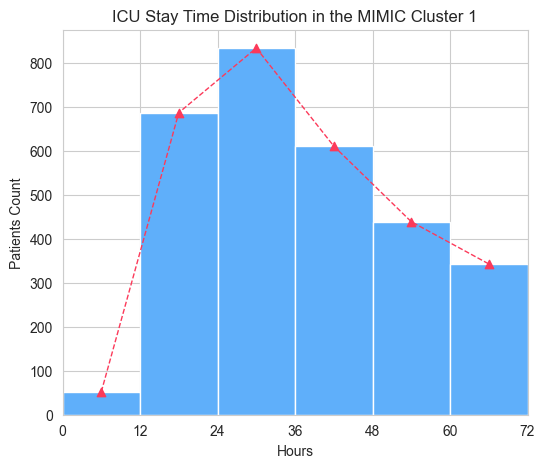

In [22]:
import matplotlib.pyplot as plt

mimic_hospital_data = eicu_mimic[eicu_mimic["hospitalid"] == -1]
mimic_hospital_patients = mimic_hospital_data["patientunitstayid"].unique()

mimic_cluster_1_drugs = mimic_icu_stays_drugs[mimic_icu_stays_drugs["SUBJECT_ID"].isin(mimic_hospital_patients)]

mimic_cluster_1_drugs = mimic_cluster_1_drugs.sort_values('LOS').drop_duplicates('SUBJECT_ID', keep='last')
mimic_cluster_1_los = mimic_cluster_1_drugs["LOS"] / (60 * 24)

mimic_cluster_1_los_patient_counts = []

for time_window_start in range(0, total_time_window, one_time_window):
    
    time_window_end = time_window_start + one_time_window
    
    mimic_cluster_1_los_data = mimic_cluster_1_drugs[(mimic_cluster_1_drugs["LOS"] >= time_window_start) & (mimic_cluster_1_drugs["LOS"] <= time_window_end)]
    mimic_cluster_1_discharge_patient_count = len(mimic_cluster_1_los_data["SUBJECT_ID"].unique())
    mimic_cluster_1_los_patient_counts.append(mimic_cluster_1_discharge_patient_count)

bin_edges = np.linspace(0, 6, 7)  # 30 bins, each representing one day

# Calculate the middle points of the bins
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])

plt.figure(figsize=(6, 5))
plt.bar(bin_centers, mimic_cluster_1_los_patient_counts, width=1.0, color="#5faffa")
plt.plot(bin_centers, mimic_cluster_1_los_patient_counts, color='#fc3a5a', linestyle='dashed', linewidth=1.0)
plt.scatter(bin_centers, mimic_cluster_1_los_patient_counts, color='#fc3a5a', marker='^', zorder=5)

x_tick_labels = [0, 12, 24, 36, 48, 60, 72]

plt.title('ICU Stay Time Distribution in the MIMIC Cluster 1')
plt.xlabel('Hours')
plt.ylabel('Patients Count')
plt.xticks(ticks=(np.arange(len(x_tick_labels))), labels=x_tick_labels, rotation=0)
plt.xlim(0, 6)
plt.grid(True)
plt.show()

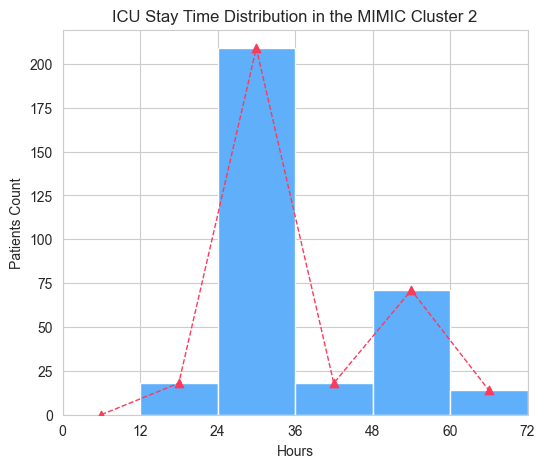

In [23]:
import matplotlib.pyplot as plt

mimic_hospital_data = eicu_mimic[eicu_mimic["hospitalid"] == -2]
mimic_hospital_patients = mimic_hospital_data["patientunitstayid"].unique()

mimic_cluster_2_drugs = mimic_icu_stays_drugs[mimic_icu_stays_drugs["SUBJECT_ID"].isin(mimic_hospital_patients)]

mimic_cluster_2_drugs = mimic_cluster_2_drugs.sort_values('LOS').drop_duplicates('SUBJECT_ID', keep='last')
mimic_cluster_2_los = mimic_cluster_2_drugs["LOS"] / (60 * 24)

mimic_cluster_2_los_patient_counts = []

for time_window_start in range(0, total_time_window, one_time_window):
    
    time_window_end = time_window_start + one_time_window
    
    mimic_cluster_2_los_data = mimic_cluster_2_drugs[(mimic_cluster_2_drugs["LOS"] >= time_window_start) & (mimic_cluster_2_drugs["LOS"] <= time_window_end)]
    mimic_cluster_2_discharge_patient_count = len(mimic_cluster_2_los_data["SUBJECT_ID"].unique())
    mimic_cluster_2_los_patient_counts.append(mimic_cluster_2_discharge_patient_count)

bin_edges = np.linspace(0, 6, 7)  # 30 bins, each representing one day

# Calculate the middle points of the bins
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])

plt.figure(figsize=(6, 5))
plt.bar(bin_centers, mimic_cluster_2_los_patient_counts, width=1.0, color="#5faffa")
plt.plot(bin_centers, mimic_cluster_2_los_patient_counts, color='#fc3a5a', linestyle='dashed', linewidth=1.0)
plt.scatter(bin_centers, mimic_cluster_2_los_patient_counts, color='#fc3a5a', marker='^', zorder=5)

x_tick_labels = [0, 12, 24, 36, 48, 60, 72]

plt.title('ICU Stay Time Distribution in the MIMIC Cluster 2')
plt.xlabel('Hours')
plt.ylabel('Patients Count')
plt.xticks(ticks=(np.arange(len(x_tick_labels))), labels=x_tick_labels, rotation=0)
plt.xlim(0, 6)
plt.grid(True)
plt.show()